<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-тарифов" data-toc-modified-id="Описание-тарифов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание тарифов</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-установка-параметров" data-toc-modified-id="Импорт-библиотек-и-установка-параметров-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Импорт библиотек и установка параметров</a></span></li><li><span><a href="#Чтение-файлов" data-toc-modified-id="Чтение-файлов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Чтение файлов</a></span></li><li><span><a href="#Подготовка-к-слиянию-таблиц" data-toc-modified-id="Подготовка-к-слиянию-таблиц-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Подготовка к слиянию таблиц</a></span></li><li><span><a href="#Слияние-таблиц" data-toc-modified-id="Слияние-таблиц-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Слияние таблиц</a></span></li><li><span><a href="#Знакомство-с-данными-и-первичная-обработка" data-toc-modified-id="Знакомство-с-данными-и-первичная-обработка-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Знакомство с данными и первичная обработка</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Графики-сравнения-тарифов" data-toc-modified-id="Графики-сравнения-тарифов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Графики сравнения тарифов</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод:</a></span></li></ul></div>

# Определение перспективного тарифа для телеком компании
Клиентам предлагают два тарифных плана: `«Смарт»` и `«Ультра»`. 
Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов
**Тариф «Смарт»**
 - Ежемесячная плата: 550 рублей
 - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
 - Стоимость услуг сверх тарифного пакета:
   - минута разговора: 3 рубля
   - сообщение: 3 рубля
   - 1 Гб интернет-трафика: 200 рублей
  
**Тариф «Ультра»**
 - Ежемесячная плата: 1950 рублей
 - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
 - Стоимость услуг сверх тарифного пакета:
   - минута разговора: 1 рубль
   - сообщение: 1 рубль
   - 1 Гб интернет-трафика: 150 рублей  
   
**Обратите внимание:** 
Мы всегда округляем вверх значения минут и мегабайтов. 
Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.   

## Описание данных
**Таблица** `users` (информация о пользователях):
 - `user_id` — уникальный идентификатор пользователя
 - `first_name` — имя пользователя
 - `last_name` — фамилия пользователя
 - `age` — возраст пользователя (годы)
 - `reg_date` — дата подключения тарифа (день, месяц, год)
 - `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
 - `city` — город проживания пользователя
 - `tariff` — название тарифного плана
 
**Таблица** `calls` (информация о звонках):
 - `id` — уникальный номер звонка
 - `call_date` — дата звонка
 - `duration` — длительность звонка в минутах
 - `user_id` — идентификатор пользователя, сделавшего звонок
 
**Таблица** `messages` (информация о сообщениях):
 - `id` — уникальный номер сообщения
 - `message_date` — дата сообщения
 - `user_id` — идентификатор пользователя, отправившего сообщение

**Таблица** `internet` (информация об интернет-сессиях):
 - `id` — уникальный номер сессии
 - `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
 - `session_date` — дата интернет-сессии
 - `user_id` — идентификатор пользователя
 
**Таблица** tariffs (информация о тарифах):
 - `tariff_name` — название тарифа
 - `rub_monthly_fee` — ежемесячная абонентская плата в рублях
 - `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
 - `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
 - `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
 - `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
 - `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
 - `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Изучение данных из файла

### Импорт библиотек и установка параметров

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

# cнимаем возможное предупреждение
import warnings
warnings.filterwarnings("ignore")

# чтобы pandas показал все столбцы фрейма ниже, включаем настройку:
pd.set_option('display.max_columns', None)

### Чтение файлов

In [2]:
# мы имеем 5 таблиц, для удобства прочтем, затем соединим их вместе

calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

### Подготовка к слиянию таблиц

In [3]:
# переименуем столбцы 'id' таблиц чтобы лучше их различать в общем датасете

calls.rename(columns = {'id': 'id_calls'}, inplace = True)
internet.rename(columns = {'id': 'id_internet'}, inplace = True)
messages.rename(columns = {'id': 'id_messages'}, inplace = True)

In [4]:
# округлим значения минут и мегабайтов

calls['duration'] = np.ceil(calls['duration'])
internet['mb_used'] = np.ceil(internet['mb_used'])

In [5]:
# приведем даты к нужному формату

calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

In [6]:
# выделим месяц в каждой таблице

calls['call_date'] = calls['call_date'].dt.month
messages['message_date'] = messages['message_date'].dt.month
internet['session_date'] = internet['session_date'].dt.month

Для каждого пользователя нам понадобится:
 - количество сделанных звонков по месяцам;
 - количество израсходованных минут по месяцам;
 - количество отправленных сообщений по месяцам;
 - объем израсходованного интернет-трафика по месяцам;

In [7]:
# сгруппируем данные

calls = calls[['call_date', 'duration', 'user_id']].pivot_table(index = ['user_id', 'call_date'], 
                                                                values = 'duration', 
                                                                aggfunc = ['count', 'sum'])

messages = messages[['message_date', 'user_id', 'id_messages']].pivot_table(index = ['user_id', 'message_date'], 
                                                                            values = 'id_messages', 
                                                                            aggfunc = 'count')

internet = internet[['session_date', 'user_id', 'mb_used']].pivot_table(index = ['user_id', 'session_date'], 
                                                                        values = 'mb_used', 
                                                                        aggfunc = 'sum')

In [8]:
# рассмотрим размер таблиц

print(calls.shape)
print(messages.shape)
print(internet.shape)

(3174, 2)
(2717, 1)
(3203, 1)


Размер таблиц разный, это говорит о том что не все услуги были использованы в один и тот же месяц.

In [9]:
# создадим первые столбцы со всеми вариантами пар пользователь - месяц чтобы ничего не упустить

df = pd.DataFrame(columns = ['user_id', 'month'], index = range(0, 6000))
row = 0
for user in range(1000, 1500):
    for month in range(1, 13):
        df.iloc[row] = [user, month]
        row +=1        

In [10]:
df

,user_id,month
0,1000,1
1,1000,2
2,1000,3
3,1000,4
4,1000,5
...,...,...
5995,1499,8
5996,1499,9
5997,1499,10
5998,1499,11


### Слияние таблиц

In [11]:
df = pd.merge(df, users[['user_id', 'city', 'tariff']], on = 'user_id', how = 'outer')
df = pd.merge(df, calls, left_on = ['user_id', 'month'], right_on = ['user_id', 'call_date'], how = 'outer')
df = pd.merge(df, messages, left_on = ['user_id', 'month'], right_on = ['user_id', 'message_date'], how = 'outer')
df = pd.merge(df, internet, left_on = ['user_id', 'month'], right_on = ['user_id', 'session_date'], how = 'outer')
df = pd.merge(df, tariffs, left_on = 'tariff', right_on = 'tariff_name', how = 'outer')

In [12]:
df

,user_id,month,city,tariff,"(count, duration)","(sum, duration)",id_messages,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,1,Краснодар,ultra,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1,ultra
1,1000,2,Краснодар,ultra,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1,ultra
2,1000,3,Краснодар,ultra,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1,ultra
3,1000,4,Краснодар,ultra,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1,ultra
4,1000,5,Краснодар,ultra,22.0,159.0,22.0,2256.0,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1499,8,Пермь,smart,NaN,NaN,NaN,NaN,50,15360,500,550,200,3,3,smart
5996,1499,9,Пермь,smart,9.0,70.0,11.0,1848.0,50,15360,500,550,200,3,3,smart
5997,1499,10,Пермь,smart,68.0,449.0,48.0,17809.0,50,15360,500,550,200,3,3,smart
5998,1499,11,Пермь,smart,74.0,612.0,59.0,17984.0,50,15360,500,550,200,3,3,smart


- Можно было использовать левое соединение, но поставив внешнее соединение мы проверили что нет значений пар пользователь - месяц, кроме тех которые мы указали в первых столбцах (количество строк не превысило изначальное количество в 6000).
- Это доказывает что мы учли все возможные варианты и не потеряли данные.

### Знакомство с данными и первичная обработка

- Переименуем столбцы, затем удалим строки где клиенты вообще не пользовались ни одним видом связи, удалим лишние столбцы.

In [13]:
df.rename(columns = {('count', 'duration') : 'number_of_calls', ('sum', 'duration') : 'duration', 
                      'id_messages' : 'number_of_messages'}, inplace = True)

df.dropna(axis = 0, subset = ['number_of_calls', 'duration', 'number_of_messages', 'mb_used'],
                       how = 'all', inplace = True)
df.reset_index(inplace = True)

df.drop(columns = ['tariff_name', 'index'], inplace = True)

In [14]:
df

,user_id,month,city,tariff,number_of_calls,duration,number_of_messages,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,Краснодар,ultra,22.0,159.0,22.0,2256.0,1000,30720,3000,1950,150,1,1
1,1000,6,Краснодар,ultra,43.0,172.0,60.0,23257.0,1000,30720,3000,1950,150,1,1
2,1000,7,Краснодар,ultra,47.0,340.0,75.0,14016.0,1000,30720,3000,1950,150,1,1
3,1000,8,Краснодар,ultra,52.0,408.0,81.0,14070.0,1000,30720,3000,1950,150,1,1
4,1000,9,Краснодар,ultra,58.0,466.0,57.0,14581.0,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,Владикавказ,smart,41.0,247.0,42.0,20604.0,50,15360,500,550,200,3,3
3210,1499,9,Пермь,smart,9.0,70.0,11.0,1848.0,50,15360,500,550,200,3,3
3211,1499,10,Пермь,smart,68.0,449.0,48.0,17809.0,50,15360,500,550,200,3,3
3212,1499,11,Пермь,smart,74.0,612.0,59.0,17984.0,50,15360,500,550,200,3,3


- Отлично, остались только строки с месяцами где действительно было использование связи.

Для каждого пользователя нам понадобится:
 - помесячная выручка с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [15]:
# расчитаем выручку за месяц

def revenue(row):
          
    sum = row['rub_monthly_fee']
        
    if (row['duration'] - row['minutes_included']) > 0:
        sum += (row['duration'] - row['minutes_included']) * row['rub_per_minute']
            
    if (row['number_of_messages'] - row['messages_included']) > 0:
        sum += (row['number_of_messages'] - row['messages_included']) * row['rub_per_message']
            
    if (row['mb_used'] - row['mb_per_month_included']) > 0:
        sum += (row['mb_used'] - row['mb_per_month_included']) / 1024 * row['rub_per_gb']
            
    return sum
        
df['revenue'] = df.apply(revenue, axis = 1)  

In [16]:
df

,user_id,month,city,tariff,number_of_calls,duration,number_of_messages,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,5,Краснодар,ultra,22.0,159.0,22.0,2256.0,1000,30720,3000,1950,150,1,1,1950.000000
1,1000,6,Краснодар,ultra,43.0,172.0,60.0,23257.0,1000,30720,3000,1950,150,1,1,1950.000000
2,1000,7,Краснодар,ultra,47.0,340.0,75.0,14016.0,1000,30720,3000,1950,150,1,1,1950.000000
3,1000,8,Краснодар,ultra,52.0,408.0,81.0,14070.0,1000,30720,3000,1950,150,1,1,1950.000000
4,1000,9,Краснодар,ultra,58.0,466.0,57.0,14581.0,1000,30720,3000,1950,150,1,1,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,Владикавказ,smart,41.0,247.0,42.0,20604.0,50,15360,500,550,200,3,3,1574.218750
3210,1499,9,Пермь,smart,9.0,70.0,11.0,1848.0,50,15360,500,550,200,3,3,550.000000
3211,1499,10,Пермь,smart,68.0,449.0,48.0,17809.0,50,15360,500,550,200,3,3,1028.320312
3212,1499,11,Пермь,smart,74.0,612.0,59.0,17984.0,50,15360,500,550,200,3,3,1425.500000


In [17]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   object 
 1   month                  3214 non-null   object 
 2   city                   3214 non-null   object 
 3   tariff                 3214 non-null   object 
 4   number_of_calls        3174 non-null   float64
 5   duration               3174 non-null   float64
 6   number_of_messages     2717 non-null   float64
 7   mb_used                3203 non-null   float64
 8   messages_included      3214 non-null   int64  
 9   mb_per_month_included  3214 non-null   int64  
 10  minutes_included       3214 non-null   int64  
 11  rub_monthly_fee        3214 non-null   int64  
 12  rub_per_gb             3214 non-null   int64  
 13  rub_per_message        3214 non-null   int64  
 14  rub_per_minute         3214 non-null   int64  
 15  reve

- Как видно из таблицы, чеще всего клиенты пользуются трафиком + звонками и в последнюю очередь сообщениями.
- Таблица довольно легкая, поэтому заниматься изменением типов не будем.

In [18]:
df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
number_of_calls,3174.0,63.8,32.7,1.0,41.0,63.0,83.0,244.0
duration,3174.0,456.9,238.0,0.0,290.0,447.0,592.0,1673.0
number_of_messages,2717.0,45.3,35.1,1.0,19.0,38.0,63.0,224.0
mb_used,3203.0,17286.7,7523.6,0.0,12543.0,16985.0,21455.5,49789.0
messages_included,3214.0,341.1,438.0,50.0,50.0,50.0,1000.0,1000.0
mb_per_month_included,3214.0,20067.4,7082.5,15360.0,15360.0,15360.0,30720.0,30720.0
minutes_included,3214.0,1266.2,1152.7,500.0,500.0,500.0,3000.0,3000.0
rub_monthly_fee,3214.0,979.1,645.5,550.0,550.0,550.0,1950.0,1950.0
rub_per_gb,3214.0,184.7,23.1,150.0,150.0,200.0,200.0,200.0
rub_per_message,3214.0,2.4,0.9,1.0,1.0,3.0,3.0,3.0


- Среднее и медианное значение звонков в месяц около 63.
- Продолжительность около 450 минут.
- По числу сообщений есть заметное смещение средней в большую сторону от медианы (38 и 45).
- Среднее и медианное значение трафика в месяц около 17 000Мб.

In [19]:
# посчитаем нулевые значения продолжительности разговора, сообщений и трафика

duration_isnull = df[df['duration'] == 0] ['duration'].isnull().count()

message_isnull = df[df['number_of_messages'] == 0] ['number_of_messages'].isnull().count()

mb_used_isnull = df[df['mb_used'] == 0] ['mb_used'].isnull().count()

print('Доля нулевых звонков: {} \nОтсутствия сообщений: {} \nНулевого трафика: {}'
      .format((duration_isnull / len(df)).round(3), (message_isnull / len(df)).round(3), (mb_used_isnull / len(df)).round(3)))

Доля нулевых звонков: 0.002 
Отсутствия сообщений: 0.0 
Нулевого трафика: 0.001


- Доли нулевых звонков и трафика очень малы, а сообщения пишут всегда.
- Не будем удалять такие строки, влияние на выборку не столь сильно, а вот информацию сохраним.

In [20]:
df[df['user_id']==1003][['user_id', 'month', 'number_of_calls', 'duration', 
                                                   'number_of_messages', 'mb_used']]

,user_id,month,number_of_calls,duration,number_of_messages,mb_used
8,1003,8,55.0,380.0,37.0,8571.0
9,1003,9,134.0,961.0,91.0,12479.0
10,1003,10,108.0,855.0,83.0,14779.0
11,1003,11,115.0,824.0,94.0,11368.0
12,1003,12,108.0,802.0,75.0,10132.0


## Анализ данных

### Графики сравнения тарифов

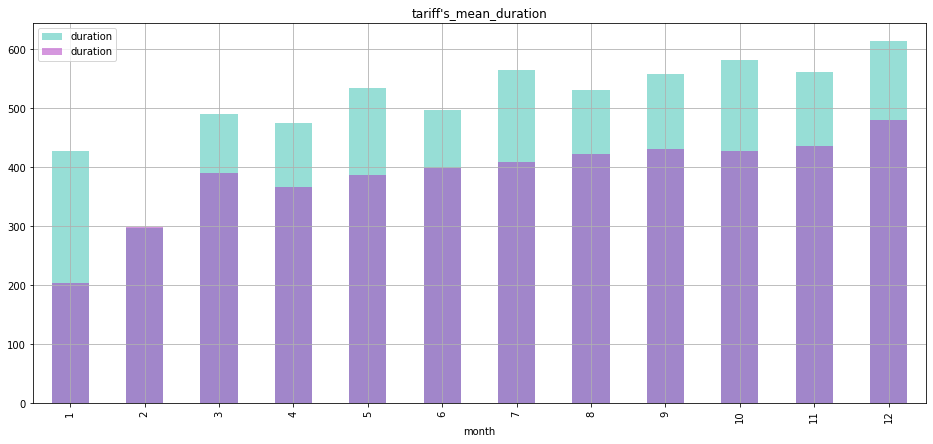

In [21]:
# сколько минут разговора, сообщений и трафика требуется пользователям каждого тарифа в месяц?

tariff_ultra = df.query('tariff == "ultra"').groupby('month') ['duration'].mean()
tariff_ultra = tariff_ultra.reset_index()
tariff_smart = df.query('tariff == "smart"').groupby('month') ['duration'].mean()
tariff_smart = tariff_smart.reset_index()

ax = tariff_ultra.plot(kind = 'bar', x = 'month', grid = True, alpha = 0.5, color = '#30bfaf',
                  figsize = (16, 7));
tariff_smart.plot(kind = 'bar', x = 'month', grid = True, alpha = 0.5, color = '#ac30bf',
                  figsize = (16, 7), title = "tariff's_mean_duration", ax = ax);

- январь и ферваль не самые активные месяцы для общения
- тариф ультра (салатовый) располагает к разговору больше во все время кроме февраля 
- именно в февраль клиенты общаются на обоих тарифах одинаково

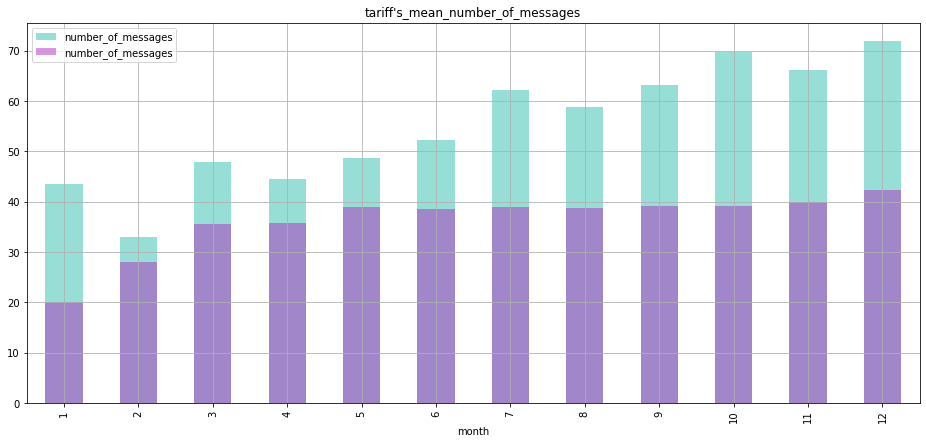

In [22]:
tariff_ultra = df.query('tariff == "ultra"').groupby('month') ['number_of_messages'].mean()
tariff_ultra = tariff_ultra.reset_index()
tariff_smart = df.query('tariff == "smart"').groupby('month') ['number_of_messages'].mean()
tariff_smart = tariff_smart.reset_index()

ax = tariff_ultra.plot(kind = 'bar', x = 'month', grid = True, alpha = 0.5, color = '#30bfaf',
                  figsize = (16, 7));
tariff_smart.plot(kind = 'bar', x = 'month', grid = True, alpha = 0.5, color = '#ac30bf',
                  figsize = (16, 7), title = "tariff's_mean_number_of_messages", ax = ax);

- по числу сообщений тариф ультра (салатовый) тоже обходит смарт
- от начала года к концу число сообщений в среднем растет, но тариф смарт (фиолетовый) к маю достигает своего пика около 40 сообщений
- в феврале тарифы по сообщениям ведут себя по разному, ультра падает, смарт растет

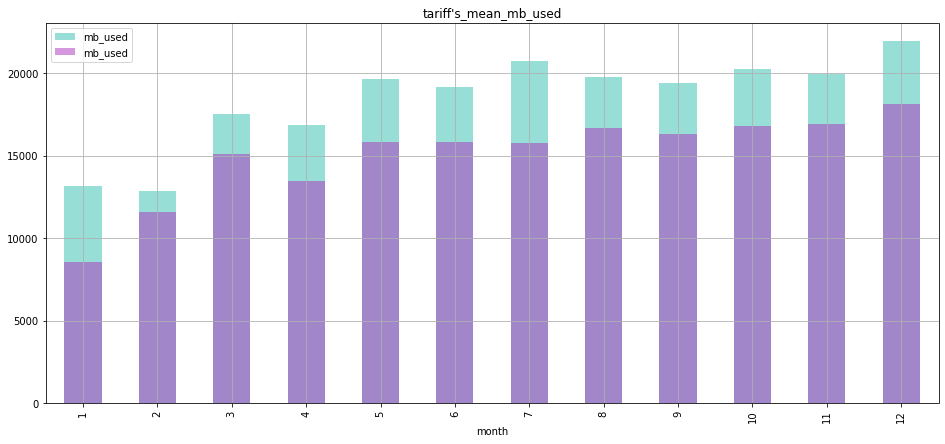

In [23]:
tariff_ultra = df.query('tariff == "ultra"').groupby('month') ['mb_used'].mean()
tariff_ultra = tariff_ultra.reset_index()
tariff_smart = df.query('tariff == "smart"').groupby('month') ['mb_used'].mean()
tariff_smart = tariff_smart.reset_index()

ax = tariff_ultra.plot(kind = 'bar', x = 'month', grid = True, alpha = 0.5, color = '#30bfaf',
                  figsize = (16, 7));
tariff_smart.plot(kind = 'bar', x = 'month', grid = True, alpha = 0.5, color = '#ac30bf',
                  figsize = (16, 7), title = "tariff's_mean_mb_used", ax = ax);

- ультра (салатовый) лидирует и в использовании трафика
- в январе и феврале трафик расходуется не столь активно, к маю выходит на плато, а декабрь это самый активный месяц

In [24]:
# найдем среднее количество, дисперсию и стандартное отклонение найденых величин

mean_for_analysis = df.groupby('tariff') [['duration', 'number_of_messages', 'mb_used']].mean().round(1)
mean_for_analysis

,duration,number_of_messages,mb_used
tariff,,,
smart,419.1,38.7,16236.5
ultra,545.5,61.2,19686.8


- пользователи 'ultra' активнее во всем

In [25]:
smart = df.query('tariff == "smart"')
np.var(smart[['duration', 'number_of_messages', 'mb_used']], axis = 0, ddof = 1).astype('int32')

duration                 35844
number_of_messages         717
mb_used               34443100
dtype: int32

In [26]:
ultra = df.query('tariff == "ultra"')
np.var(ultra[['duration', 'number_of_messages', 'mb_used']], axis = 0, ddof = 1).astype('int32')

duration                 94203
number_of_messages        2109
mb_used               99043439
dtype: int32

- дисперсия в 'ultra' заметно выше
- теперь расчитаем стандартное отклонение

In [27]:
np.std(smart[['duration', 'number_of_messages', 'mb_used']], axis = 0).astype('int32')

duration               189
number_of_messages      26
mb_used               5867
dtype: int32

In [28]:
np.std(ultra[['duration', 'number_of_messages', 'mb_used']], axis = 0).astype('int32')

duration               306
number_of_messages      45
mb_used               9946
dtype: int32

In [29]:
df.pivot_table(index='tariff',  
                 values=['duration', 'number_of_messages', 'mb_used'], 
                 aggfunc=['mean', 'std', 'var']).T.style.format('{:.2f}')

In [30]:
my_func = lambda x: np.mean(x), lambda x: np.std(x, ddof=1), lambda x: np.var(x, ddof=1)

df.pivot_table(index='tariff',  
                 values=['duration', 'number_of_messages', 'mb_used'], 
                 aggfunc=my_func).T.style.format('{:.2f}')

- стандартное отклонение зависит от дисперсии, поэтому в 'ultra' оно тоже больше

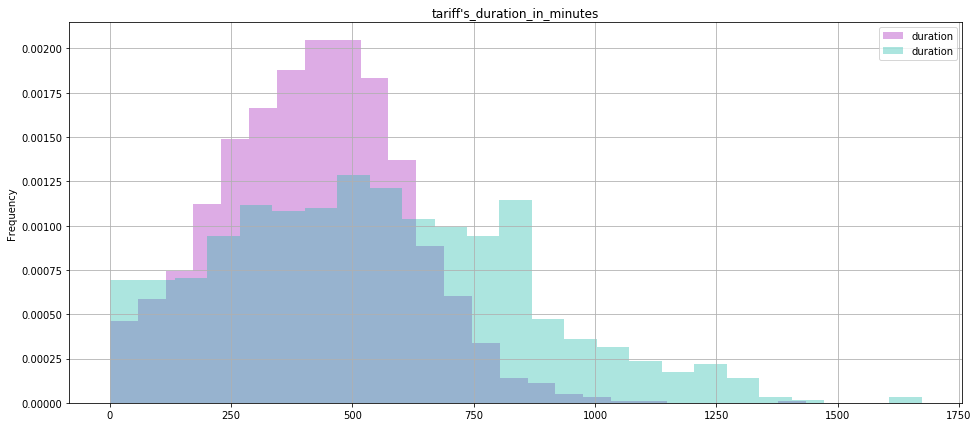

In [31]:
ax = smart['duration'].plot(bins = 25, kind = 'hist', \
                                       figsize = (16, 7), grid = True, alpha = 0.4, color = '#ac30bf', \
                                       legend = True, density = True);

ultra['duration'].plot(bins = 25, kind = 'hist', \
                                       figsize = (16, 7), grid = True, alpha = 0.4, color = '#30bfaf', density = True, \
                                       title = "tariff's_duration_in_minutes", ax = ax, x = 'duration', \
                                       legend = True);

- оба распределения имеют отрицательную скошенность
- 'ultra' (салатовый) имеет распределение вида 'плато'
- по 'smart' разговаривают чаще около 400 минут, по 'ultra' чаще говорят дольше

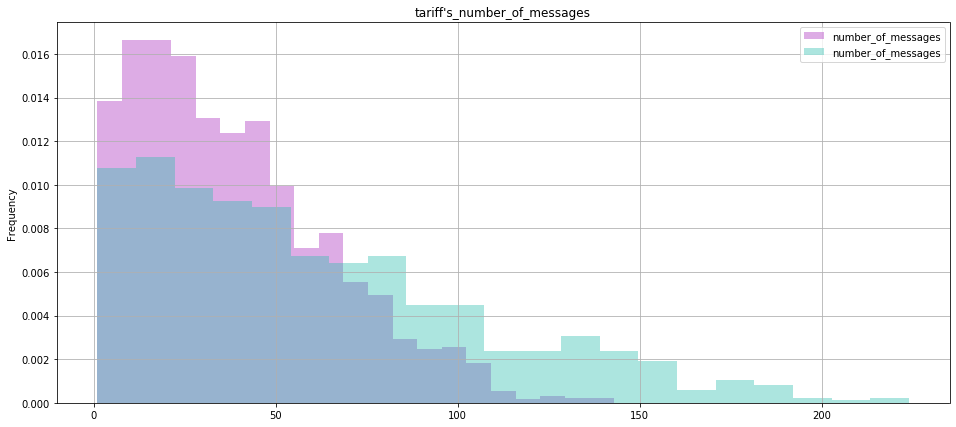

In [32]:
ax = smart['number_of_messages'].plot(bins = 21, kind = 'hist', \
                                       figsize = (16, 7), grid = True, alpha = 0.4, color = '#ac30bf', legend = True, density = True);

ultra['number_of_messages'].plot(bins = 21, kind = 'hist', \
                                       figsize = (16, 7), grid = True, alpha = 0.4, color = '#30bfaf', density = True, \
                                       title = "tariff's_number_of_messages", ax = ax, x = 'number_of_messages', legend = True);

- оба распределения с обрывом слева
- по 'smart' (фиолетовый) сообщения отправляют чаще в меньшем количестве

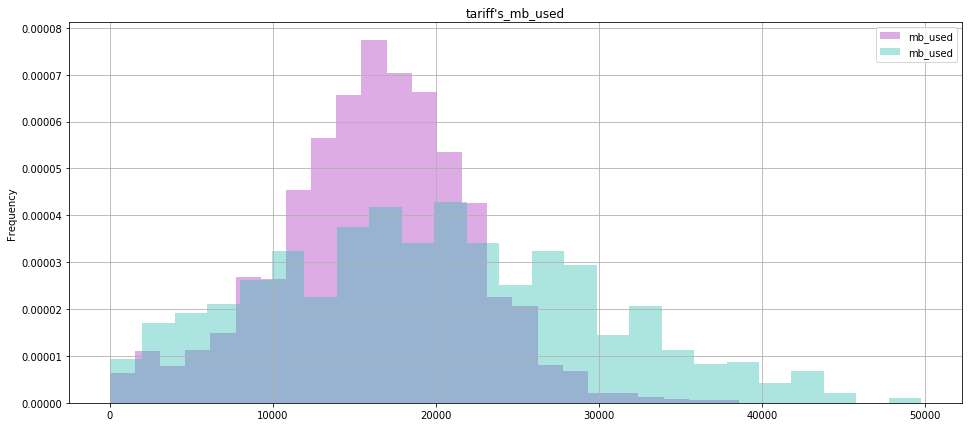

In [33]:
ax = smart['mb_used'].plot(bins = 25, kind = 'hist', \
                                       figsize = (16, 7), grid = True, alpha = 0.4, color = '#ac30bf',\
                                       legend = True, density = True);

ultra['mb_used'].plot(bins = 25, kind = 'hist', \
                                       figsize = (16, 7), grid = True, alpha = 0.4, color = '#30bfaf', \
                                       title = "tariff's_mb_used", ax = ax, x = 'mb_used', legend = True, density = True);

- здесь оба распределения с небольшой скошенностью слева, и в 'ultra' (салатовый) чаще используют много и мало трафика
- тариф 'smart' (фиолетовый) имеет распределение более собранное у средних значений

## Проверка гипотез

- за нулевую гипотезу возьмем утверждение о том что средния выручка у тарифов равна
- за альтернативную то что она различается статистически значимо

In [34]:
results = st.ttest_ind(smart['revenue'], ultra['revenue'], equal_var = False)
alpha = 0.05
if results.pvalue <= alpha:
    print('p-значение: {} отвергаем нулевую гипотезу.'.format(results.pvalue))
    print('\n Cредняя выручка на тарифах разная.')
else:
    print('p-значение: {} нельзя отвергнуть нулевую гипотезу.'.format(results.pvalue))
    print('\n Cредняя выручка на тарифах статистически не различима.')

p-значение: 8.931402711366754e-296 отвергаем нулевую гипотезу.

 Cредняя выручка на тарифах разная.


- для данной проверки мы использовали метод `ttest_ind` который проверяет равенство средних для двух выборок
- дополнительно указав парметр `equal_var = False` мы учли что дисперсия наших выборок разная

- теперь проверим гипотезу о том чтосредняя выручка в Москве отлична от других городов
- нулевая гипотеза: средняя выручка Москвы не отличается от других городов, альтернативна соответственно наоборот

In [35]:
results = st.ttest_ind(df.query('city == "Москва"') ['revenue'],
                       df.query('city != "Москва"') ['revenue'])
alpha = 0.05

if results.pvalue <= alpha:
    print('p-значение: {} отвергаем нулевую гипотезу.'.format(results.pvalue))
    print('\n Cредняя выручка Москвы и других городов разная.')
else:
    print('p-значение: {} нельзя отвергнуть нулевую гипотезу.'.format(results.pvalue))
    print('\n Cредняя выручка Москвы и других городов статистически не различима.')

p-значение: 0.47443187631524797 нельзя отвергнуть нулевую гипотезу.

 Cредняя выручка Москвы и других городов статистически не различима.


- как видим вероятность ошибки первого рода слишком велика, мы не можем отвергнуть гипотезу о равенстве средних между Москвой и   другими городами

- так какой тариф приносит больше выручки?
- давайте посмотрим на среднее и медианное значение

In [36]:
df.pivot_table(index = 'tariff', values = 'revenue', aggfunc = ['mean', 'median']).round(1)

,mean,median
,revenue,revenue
tariff,,
smart,1233.3,959.9
ultra,2060.5,1950.0


- `ultra` выгоднее и стабильнее
- `smart` имеет пользователей которые сильно двигают среднее вверх, возможно стоит также сосредоточиться на них 
- а так как разницы между Москвой и регионами по выручке нет, можно запускать рекламу тарифа везде

## Общий вывод:

Среднее и медианное значение звонков в месяц около **63**.  

Продолжительность около **450** минут.  

По числу сообщений есть заметное смещение средней в большую сторону от медианы (**38 и 45**).  

Среднее и медианное значение трафика в месяц около **17 000**Мб.  

Январь и ферваль не самые активные месяцы для общения.  

Тариф ультра располагает к разговору больше во все время кроме февраля.  

Именно в февраль клиенты общаются голосом на обоих тарифах одинаково.   

От начала года к концу число сообщений **в среднем растет**, тариф смарт к маю достигает своего пика около **40** сообщений.   

В феврале тарифы по сообщениям **ведут себя по разному**, ультра **падает**, смарт **растет**. 

В январе и феврале трафик расходуется не столь активно, к маю выходит на плато, а декабрь это самый активный месяц.  

Пользователи ультра активнее в сообщениях, трафике, и разговорах.

`ultra` **выгоднее** по выручке и **стабильнее**.  

`smart` имеет пользователей которые сильно двигают среднее вверх, возможно стоит также сосредоточиться на них.  

А так как разницы между Москвой и регионами по выручке нет, можно запускать рекламу тарифа везде.